Here's a simple example in Python demonstrating PCA for dimensionality reduction before training a scikit-learn classifier:

This example first standardizes the data and then applies PCA with the elbow method to choose the number of components. It then trains a Logistic Regression classifier on the transformed data and demonstrates how to use the fitted scaler and PCA on unseen data for prediction.

Remember to adjust the number of components (k) based on your specific data and analysis.

Also we can split the train and test and apply Standadization and PCA only on training data, then apply the same scaler for test data.

- Data Splitting: It uses `train_test_split` to divide the data into training and testing sets (70% training, 30% testing by default).
- Scaling and PCA on Training Data: Standardization and PCA are applied only to the training data to avoid information leakage.
- Scaling and PCA on Test Data: The fitted scaler and PCA are used to transform the test data after splitting.
- Model Training and Evaluation: The model is trained on the transformed training data and evaluated on the transformed test data using accuracy score as an example.

This approach ensures that the model is trained on data that has undergone the same transformations as the unseen data it will encounter during testing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(2)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4]

In [3]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the training data (don't scale test data yet)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

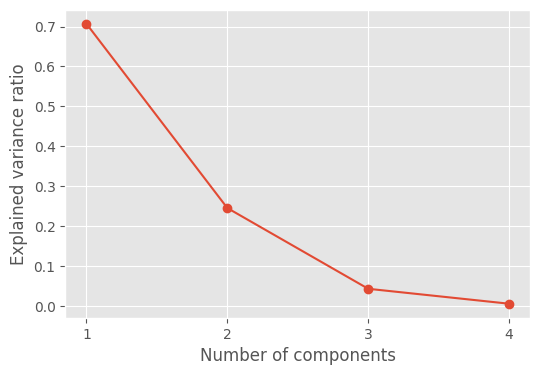

In [4]:
# Apply PCA with the elbow method to choose components on training data
pca = PCA()
pca.fit(X_train_scaled)
explained_variance = pca.explained_variance_ratio_

# Plot explained variance to choose number of components (k)
import matplotlib.pyplot as plt

x = range(1, len(explained_variance) + 1)
plt.plot(x, explained_variance, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.xticks(x)
plt.show()  # Choose k based on the elbow point in the plot


In [6]:
# Choose k based on the elbow point (adjust based on your plot)
k = 3

# Apply PCA with chosen k on training data
pca = PCA(n_components=k)
X_train_pca = pca.fit_transform(X_train_scaled)

# Apply the fitted scaler to standardize the test data
X_test_scaled = scaler.transform(X_test)

# Apply the fitted PCA to transform the test data
X_test_pca = pca.transform(X_test_scaled)

# Train the classifier (Logistic Regression in this example)
clf = LogisticRegression()
clf.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_pca)

# Evaluate the model performance (e.g., accuracy score)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")


Accuracy on test set: 1.0000
